# Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Load the Dataset

In [34]:
# Load the Iris dataset
iris = load_iris()

X = iris.data
y = iris.target

# Select only two classes for binary classification
binary_mask = (y == 0) | (y == 1)
X_binary = X[binary_mask]
y_binary = y[binary_mask]



# Split the Data into Training and Testing Sets

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


# Train the Logistic Regression Model

In [36]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=200)

# Make Predictions

In [37]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


# Evaluate the Model

In [38]:
# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00
Confusion Matrix:
[[17  0]
 [ 0 13]]


# Plot the Results

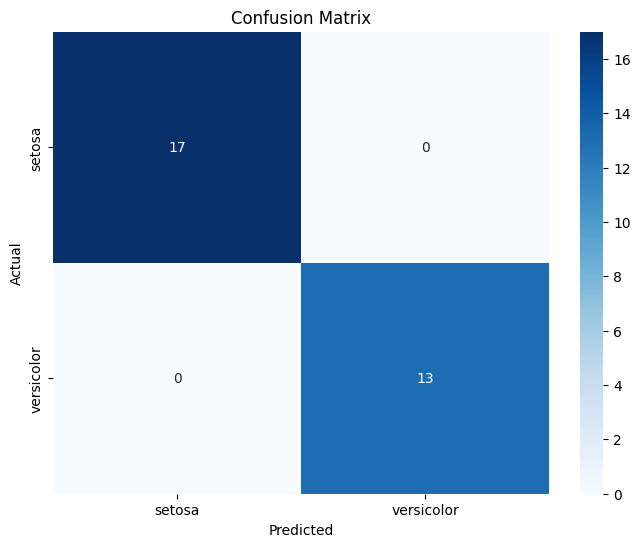

In [39]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [40]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

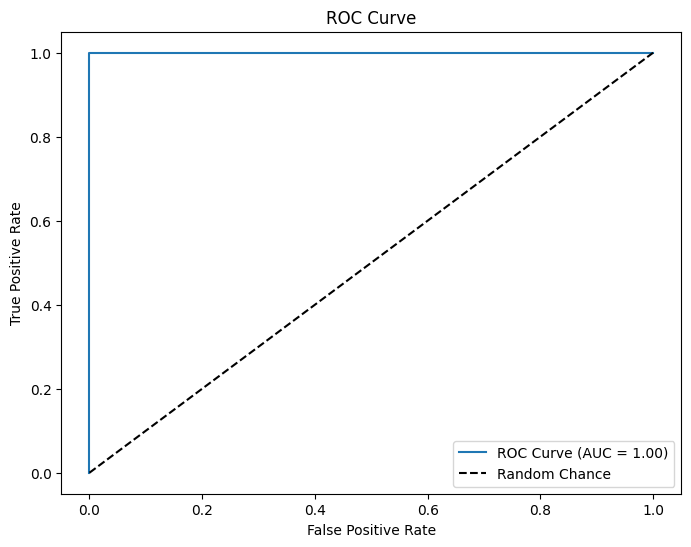

In [41]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()